In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import mode

# Task 1

### (b)

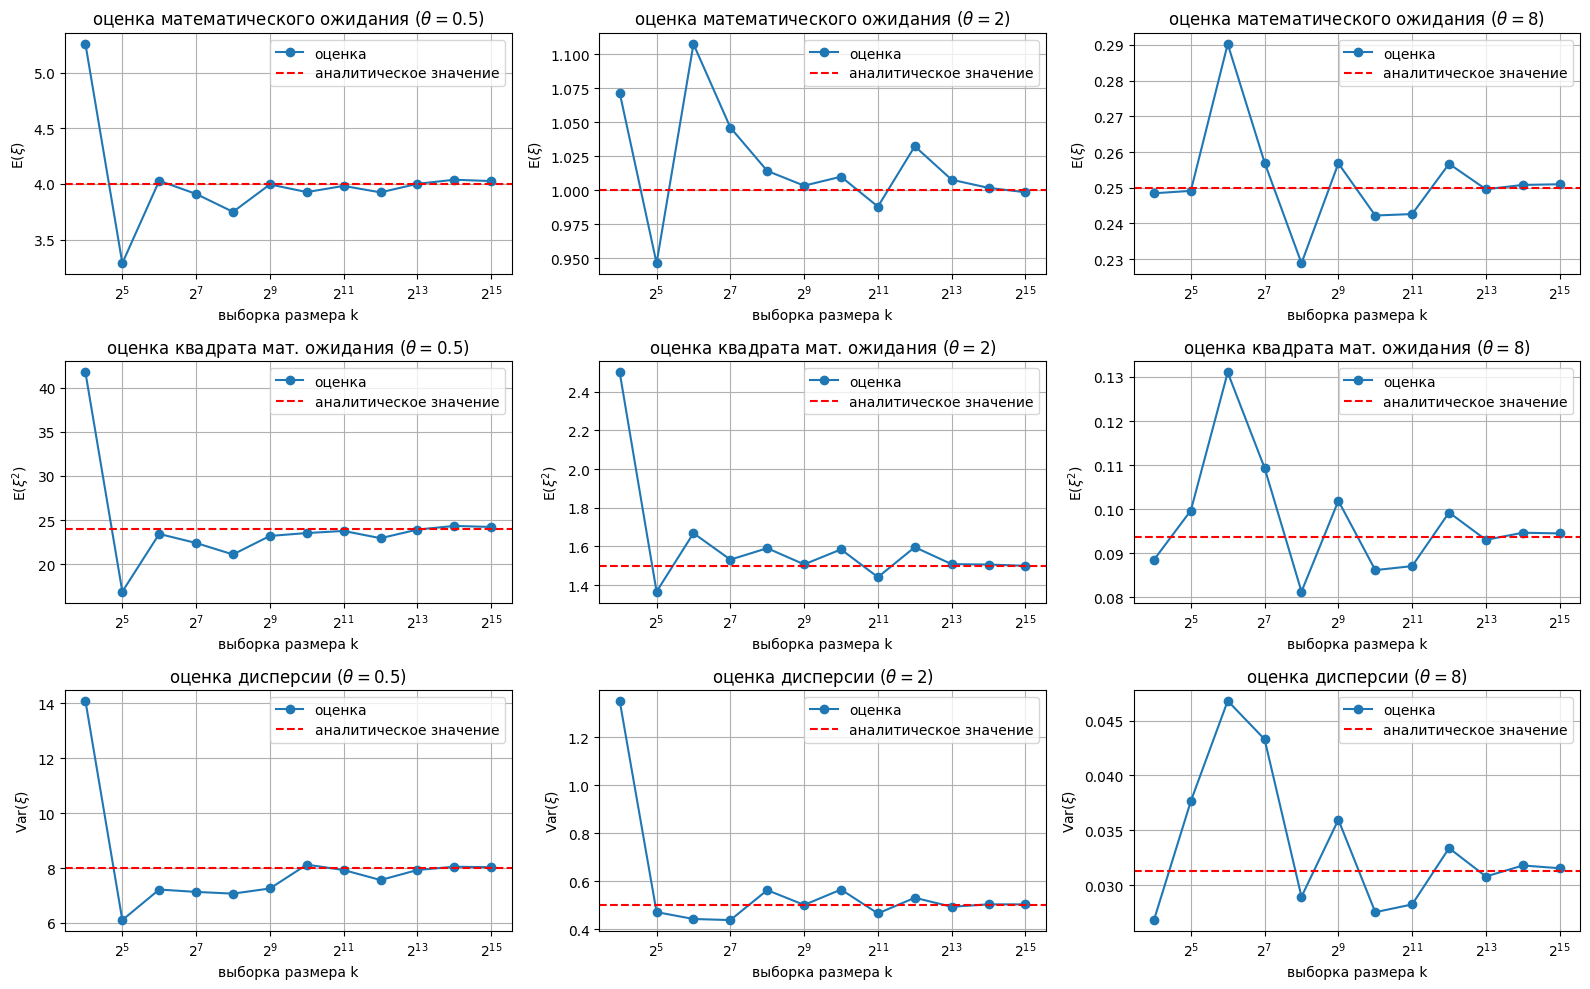

In [2]:
np.random.seed(0) 

theta_values = [0.5, 2, 8]
k_values = [2**i for i in range(4, 16)]

analytical_mean = lambda theta: 2 / theta
analytical_squared_mean = lambda theta: 6 / theta**2
analytical_variance = lambda theta: 2 / theta**2

results = {theta: {"mean": [], "variance": [], "squared_mean": []} for theta in theta_values}

for theta in theta_values:
    for k in k_values:
        sample = np.random.gamma(2, 1/theta, size=k)
        
        sample_mean = np.mean(sample)
        sample_variance = np.var(sample, ddof=1) 
        squared_sample_mean = sample_variance+sample_mean**2
        
        results[theta]["mean"].append(sample_mean)
        results[theta]["variance"].append(sample_variance)
        results[theta]["squared_mean"].append(squared_sample_mean)

fig, axes = plt.subplots(3, 3, figsize=(16, 10))
axes = axes.T # столбец - одна тетта

metrics = ["mean", "squared_mean", "variance"]
titles = ["оценка математического ожидания", "оценка квадрата мат. ожидания", "оценка дисперсии"]
y_labels = [r"$\text{E}(\xi)$", r"$\text{E}(\xi^2)$", r"$\text{Var}(\xi)$"]

for i, theta in enumerate(theta_values):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        ax.plot(k_values, results[theta][metric], label="оценка", marker='o')
        ax.axhline(y=analytical_mean(theta) if metric == "mean" else
                      analytical_variance(theta) if metric == "variance" else
                      analytical_squared_mean(theta), color="red", linestyle="--", label="аналитическое значение")
        ax.set_xscale("log", base=2)
        ax.set_title(f"{titles[j]} ($\\theta={theta}$)")
        ax.set_xlabel("выборка размера k")
        ax.set_ylabel(y_labels[j])
        ax.legend()
        ax.grid()

plt.tight_layout()
plt.show()

# Task 2

### (b)

In [3]:
np.random.seed(0)

lambda_param, a = 2, 2

def generate_sample(size, lambda_param, a):
    return np.random.exponential(scale=1/lambda_param, size=size) + a

def get_statistics(sample):
    sample_mode = mode(sample, keepdims=False).mode 
    sample_mean = np.mean(sample)  
    sample_median = np.median(sample) 

    return sample_mode, sample_mean, sample_median

large_sample = generate_sample(100_000, lambda_param, a)
np.random.seed(0)
small_sample = generate_sample(20, lambda_param, a)

mode_large, mean_large, median_large = get_statistics(large_sample)
mode_small, mean_small, median_small = get_statistics(small_sample)

In [4]:
print("=== выборка из 10_000 ===")
print(f"оценка моды: {mode_large}")
print(f"оценка математического ожидания: {mean_large}")
print(f"оценка медианы: {median_large}\n")

print("=== выборка из 20 ===")
print(f"оценка моды: {mode_small}")
print(f"оценка математического ожидания: {mean_small}")
print(f"оценка медианы: {median_small}\n")

print(f"аналитическое значение моды: 2")
print(f"аналитическое значение математического ожидания: {a + 1/lambda_param}")
print(f"аналитическое значение медианы: {a + np.log(2)/lambda_param}")

=== выборка из 10_000 ===
оценка моды: 2.0000016552799686
оценка математического ожидания: 2.4998389871355022
оценка медианы: 2.345895119613645

=== выборка из 20 ===
оценка моды: 2.0102127933421126
оценка математического ожидания: 2.580677766593962
оценка медианы: 2.4406639981357228

аналитическое значение моды: 2
аналитическое значение математического ожидания: 2.5
аналитическое значение медианы: 2.3465735902799727


### (c)

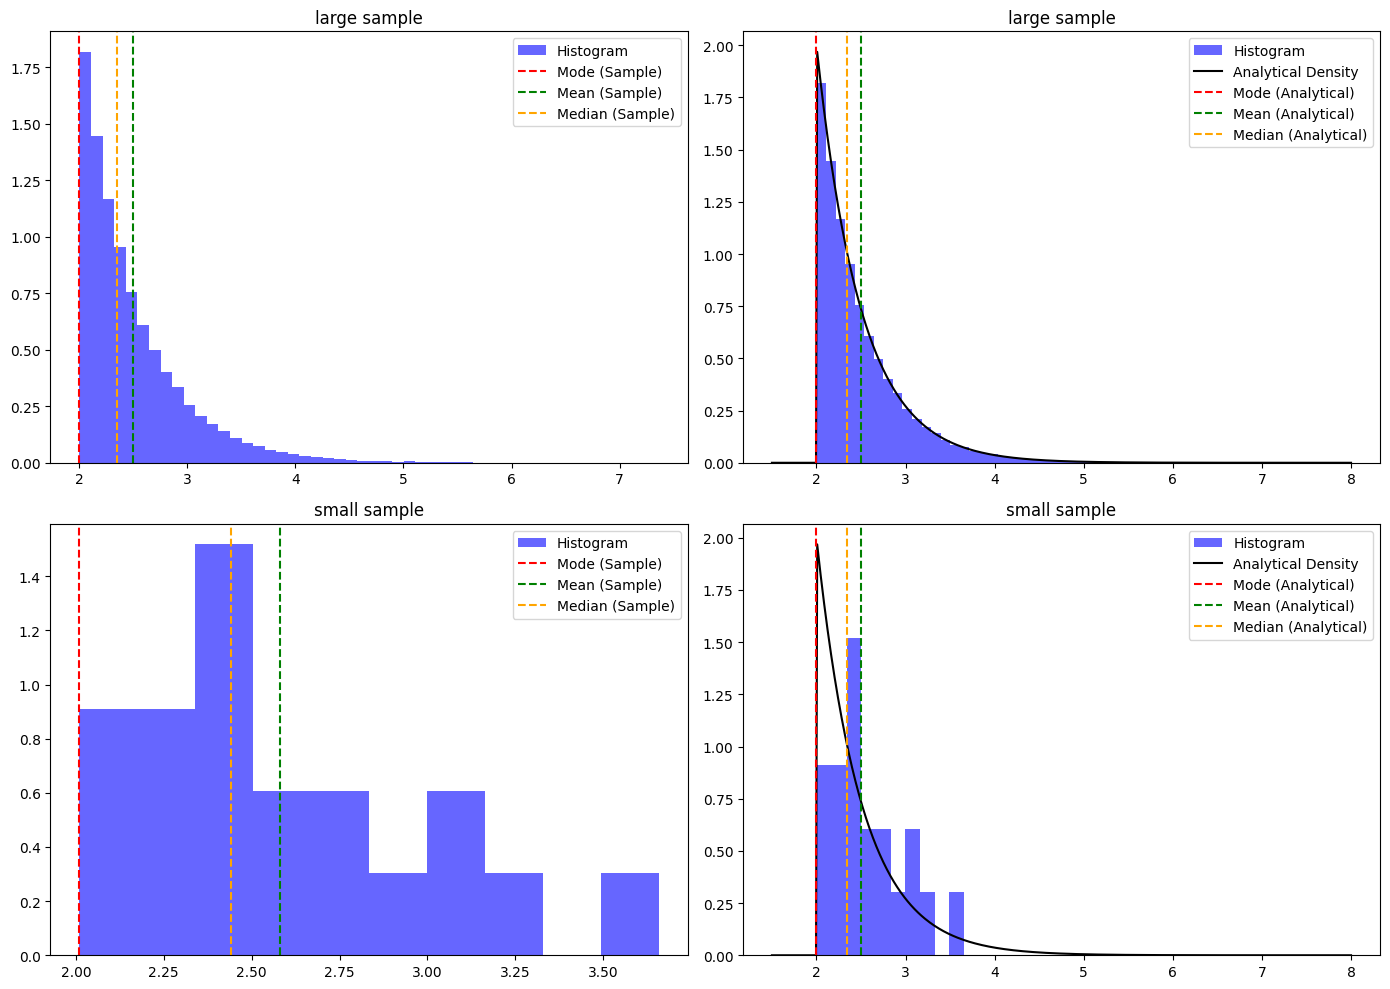

In [5]:
x_values = np.linspace(1.5, 8, 500) 
fig, axes = plt.subplots(2, 2, figsize=(14, 10))


axes[0, 0].hist(large_sample, bins=50, density=True, alpha=0.6, color='blue', label='Histogram')
axes[0, 0].axvline(mode_large, color='red', linestyle='--', label='Mode (Sample)')
axes[0, 0].axvline(mean_large, color='green', linestyle='--', label='Mean (Sample)')
axes[0, 0].axvline(median_large, color='orange', linestyle='--', label='Median (Sample)')
axes[0, 0].set_title("large sample")
axes[0, 0].legend()


axes[1, 0].hist(small_sample, bins=10, density=True, alpha=0.6, color='blue', label='Histogram')
axes[1, 0].axvline(mode_small, color='red', linestyle='--', label='Mode (Sample)')
axes[1, 0].axvline(mean_small, color='green', linestyle='--', label='Mean (Sample)')
axes[1, 0].axvline(median_small, color='orange', linestyle='--', label='Median (Sample)')
axes[1, 0].set_title("small sample")
axes[1, 0].legend()


def analytical_density(x, lambda_param, a):
    return lambda_param * np.exp(-lambda_param * (x - a)) * (x >= a)

axes[0, 1].hist(large_sample, bins=50, density=True, alpha=0.6, color='blue', label='Histogram')
axes[0, 1].plot(x_values, analytical_density(x_values, lambda_param, a), color='black', label='Analytical Density')
axes[0, 1].axvline(a, color='red', linestyle='--', label='Mode (Analytical)')
axes[0, 1].axvline(a + 1/lambda_param, color='green', linestyle='--', label='Mean (Analytical)')
axes[0, 1].axvline(a + np.log(2)/lambda_param, color='orange', linestyle='--', label='Median (Analytical)')
axes[0, 1].set_title("large sample")
axes[0, 1].legend()


axes[1, 1].hist(small_sample, bins=10, density=True, alpha=0.6, color='blue', label='Histogram')
axes[1, 1].plot(x_values, analytical_density(x_values, lambda_param, a), color='black', label='Analytical Density')
axes[1, 1].axvline(a, color='red', linestyle='--', label='Mode (Analytical)')
axes[1, 1].axvline(a + 1/lambda_param, color='green', linestyle='--', label='Mean (Analytical)')
axes[1, 1].axvline(a + np.log(2)/lambda_param, color='orange', linestyle='--', label='Median (Analytical)')
axes[1, 1].set_title("small sample")
axes[1, 1].legend()


plt.tight_layout()
plt.show()


# Task 2

In [6]:
A, B, C = 0.5, 0.4, 0.2
n = 10_000

matrix = {
    -1: [A**(i+1)*B for i in range(n)],
    0: [A**(i+1)*C for i in range(n)],
    1: [A**(i+1)*B for i in range(n)]
}


mean_xi = sum(k*sum(v) for k,v in matrix.items())
mean_nu = sum(k*A**k for k in range(n))

mean_xi_2 = sum((k**2)*sum(v) for k,v in matrix.items())
mean_nu_2 = sum(k**2*A**k for k in range(n))

var_xi = mean_xi_2 - mean_xi**2
var_nu = mean_nu_2 - mean_nu**2

mean_xi_nu = 0

cov_xi_nu = mean_xi_nu - mean_xi*mean_nu
corr_xi_nu = cov_xi_nu / (var_xi*var_nu)**0.5

corr_xi_xi = (mean_xi_2 - mean_xi*mean_xi) / (var_xi*var_xi)**0.5
corr_nu_nu = (mean_nu_2 - mean_nu*mean_nu) / (var_nu*var_nu)**0.5

corr_matrix = [[corr_xi_xi, corr_xi_nu], [corr_xi_nu, corr_nu_nu]]

print(f"мат. ожидание ξ: {mean_xi}",
      f"мат. ожидание η: {mean_nu}",
      f"мат. ожидание квадрата ξ: {mean_xi_2}",
      f"мат. ожидание квадрата η: {mean_nu_2}",
      f"дисперсия ξ: {var_xi}",
      f"дисперсия η: {var_nu}",
      f"ковариация ξ и η: {cov_xi_nu}",
      f"корреляция ξ и η: {corr_xi_nu}",
      f"корреляция ξ и ξ: {corr_xi_xi}",
      f"корреляция η и η: {corr_nu_nu}",
      sep="\n")

print()
def print_matrix(matrix):
    print("матрица ковариаций:")
    for row in matrix:
        print(*row)
    print()

print_matrix(corr_matrix)

мат. ожидание ξ: 0.0
мат. ожидание η: 2.0
мат. ожидание квадрата ξ: 0.8
мат. ожидание квадрата η: 6.0
дисперсия ξ: 0.8
дисперсия η: 2.0
ковариация ξ и η: 0.0
корреляция ξ и η: 0.0
корреляция ξ и ξ: 1.0
корреляция η и η: 1.0

матрица ковариаций:
1.0 0.0
0.0 1.0

